# 12. Which cities are the worst with regard to access to train facilities? You can do this by calculating the travel distance, travel time, … Would you recommend based on this, and the visualization in Q5, to create some new routes?

In [30]:
import src.data_processing.data as data

In [31]:
facilities = data.facilities

The top 10 stations regarding the number of facilities they own

In [32]:
facilities['count'] = facilities.loc[:,['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].sum(axis=1)
facilities[["name" , "count"]].sort_values(by = "count", ascending = False).head(10)

,name,count
25,antwerpen-centraal,17.0
118,brussel-zuid/bruxelles-midi,16.0
247,gent-sint-pieters,15.0
109,brugge,15.0
386,liège-guillemins,15.0
115,brussel-noord/bruxelles-nord,14.0
466,namur,14.0
367,leuven,14.0
448,mons,13.0
490,oostende,13.0


In [33]:
facilities["count"].describe()

count    557.000000
mean       4.046679
std        3.130491
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: count, dtype: float64

<AxesSubplot: ylabel='Frequency'>

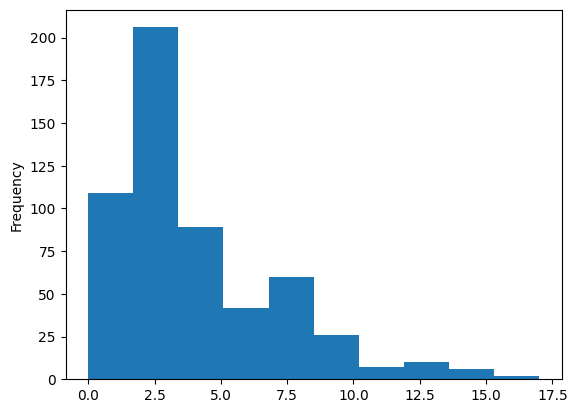

In [34]:
facilities["count"].plot.hist(bins = 10)

In [35]:
stations_distance = data.stations_distance
stations_distance["stationfrom"]= stations_distance["stationfrom"].str.lower()
stations_distance["stationto_n"] = stations_distance["stationto_n"].str.lower()
stations_distance.sort_values(by="length", ascending = False)


,stationfrom,stationto_i,stationto_n,length,geometry,total_length,count,length/count
835,ans,715,leuven,66.219913,"LINESTRING (4.71621 50.88137, 4.71618 50.88128...",75.584426,3,25.194809
832,leuven,31,ans,66.219913,"LINESTRING (4.71621 50.88137, 4.71618 50.88128...",98.911160,6,16.485193
552,brux-ouest,455,gent-st-p,53.737634,"LINESTRING (4.32282 50.85206, 4.32251 50.85146...",137.591647,7,19.655950
1025,gent-st-p,223,brux-ouest,53.737634,"LINESTRING (4.32282 50.85206, 4.32251 50.85146...",215.549418,9,23.949935
440,gent-st-p,415,forest-midi,52.603059,"LINESTRING (4.31035 50.81007, 4.30981 50.81062...",215.549418,9,23.949935
...,...,...,...,...,...,...,...,...
1324,jemeppe-s-s,515,ham-s-sambre,0.774603,"LINESTRING (4.67291 50.45281, 4.67257 50.45283...",10.701237,3,3.567079
860,geronstere,1097,spa,0.758586,"LINESTRING (5.85578 50.49024, 5.85599 50.49028...",0.758586,1,0.758586
201,spa,459,geronstere,0.758586,"LINESTRING (5.85578 50.49024, 5.85599 50.49028...",6.854911,2,3.427456
84,brux-schuman,218,bruxell-lux,0.676258,"LINESTRING (4.38002 50.84285, 4.37937 50.84263...",25.145466,6,4.190911


In [36]:
stations_distance["total_length"] = stations_distance.groupby("stationfrom")["length"].transform("sum")
stations_distance["count"] = stations_distance.groupby("stationfrom")["stationfrom"].transform("count")
# stations_distance = stations_distance.groupby("stationfrom").sum().reset_index()[["stationfrom", "length", "count"]].rename({"stationfrom": "station"}, axis=1)
stations_distance["length/count"] = stations_distance["total_length"] / stations_distance["count"]
stations_distance

,stationfrom,stationto_i,stationto_n,length,geometry,total_length,count,length/count
0,luttre,286,courc-motte,5.513544,"LINESTRING (4.38425 50.50601, 4.38444 50.50588...",11.716203,3,3.905401
1,thulin,501,hainin,1.567201,"LINESTRING (3.76679 50.42803, 3.76628 50.42791...",6.082822,2,3.041411
2,hasselt,19,alken,6.494286,"LINESTRING (5.29175 50.88640, 5.31405 50.89927...",37.297193,5,7.459439
3,mery,579,hony,1.477955,"LINESTRING (5.58707 50.54825, 5.58713 50.54815...",4.600313,2,2.300157
4,ezemaal,1146,tienen,6.307973,"LINESTRING (4.92564 50.80793, 4.93014 50.80467...",9.546610,2,4.773305
...,...,...,...,...,...,...,...,...
1375,forest-midi,455,gent-st-p,52.603059,"LINESTRING (4.31035 50.81007, 4.30981 50.81062...",139.499513,7,19.928502
1376,etterbeek,1761,delta,1.534245,"LINESTRING (4.40436 50.81920, 4.40371 50.81817...",8.203539,5,1.640708
1377,bissegem,649,kortrijk,3.494127,"LINESTRING (3.22409 50.82579, 3.23775 50.83018...",21.324587,3,7.108196
1378,engis,530,haute-flone,6.000201,"LINESTRING (5.40222 50.58266, 5.40111 50.58229...",10.076804,2,5.038402


In [37]:
stations_distance = stations_distance[["stationfrom", "total_length","count",  "length/count"]].drop_duplicates().rename(columns = {"stationfrom" : "station", "count" : "neighbours_count"})
stations_distance

,station,total_length,neighbours_count,length/count
0,luttre,11.716203,3,3.905401
1,thulin,6.082822,2,3.041411
2,hasselt,37.297193,5,7.459439
3,mery,4.600313,2,2.300157
4,ezemaal,9.546610,2,4.773305
...,...,...,...,...
1213,natoye,7.889648,2,3.944824
1226,de panne,3.669362,1,3.669362
1316,hamont,8.684387,1,8.684387
1317,oostende,21.897862,1,21.897862


The top 10 stations with the most neighbouring stations:

In [38]:
stations_distance[["station", "neighbours_count"]].sort_values(by = "neighbours_count", ascending = False).head(10)

,station,neighbours_count
272,schaerbeek,11
406,gent-st-p,9
430,melle,9
375,mechelen,9
336,bruxell-midi,9
316,halle,7
304,forest-midi,7
282,antw-berchem,7
298,diegem,7
294,liege-guill,7


<AxesSubplot: ylabel='Frequency'>

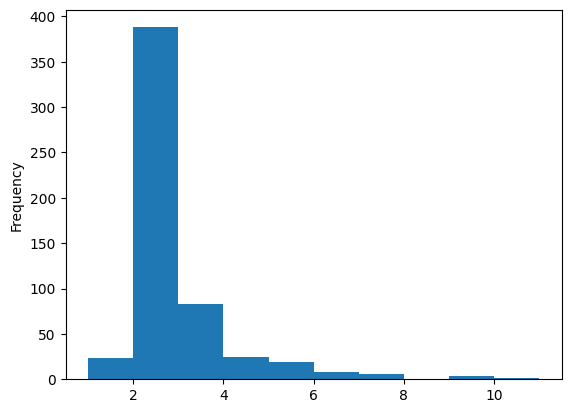

In [39]:
stations_distance["neighbours_count"].plot.hist()

The top 10 stations with the most total distance to neighbouring stations:

In [40]:
stations_distance[["station", "total_length"]].sort_values(by = "total_length", ascending = False).head(10)

,station,total_length
406,gent-st-p,215.549418
430,melle,182.045935
336,bruxell-midi,147.412160
304,forest-midi,139.499513
209,brux-ouest,137.591647
324,zwijndrecht,110.407316
375,mechelen,104.739717
270,melsele,104.735292
606,leuven,98.911160
194,welkenraedt,94.923633


<AxesSubplot: ylabel='Frequency'>

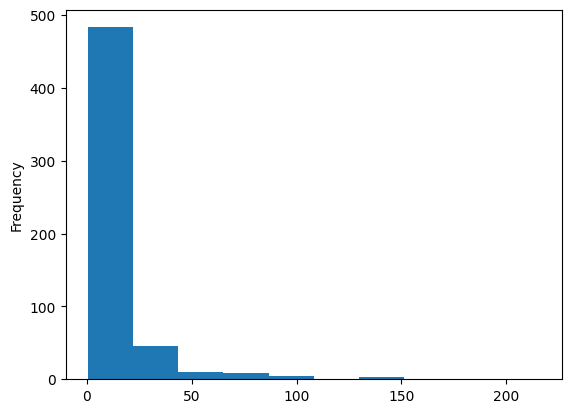

In [41]:
stations_distance["total_length"].plot.hist()

The top 10 stations with the most total distance to neighbouring stations, divided by the number of neighbouring stations (average length)

In [42]:
stations_distance[["station", "length/count"]].sort_values(by = "length/count", ascending = False).head(10)

,station,length/count
630,ans,25.194809
406,gent-st-p,23.949935
346,hergenrath,22.664595
460,florenville,22.534024
324,zwijndrecht,22.081463
1317,oostende,21.897862
627,vise,21.483349
644,tongeren,21.076508
972,noord'kempen,20.961412
270,melsele,20.947058


<AxesSubplot: ylabel='Frequency'>

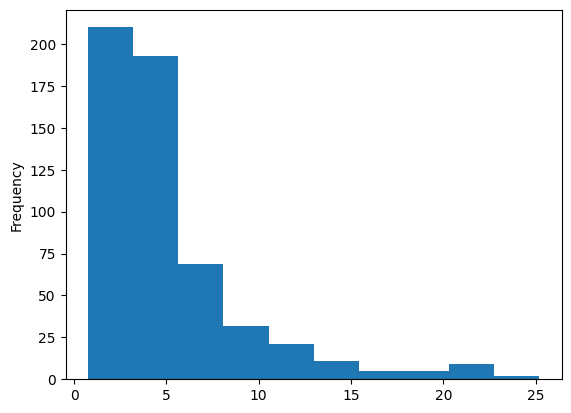

In [43]:
stations_distance["length/count"].plot.hist()

# From here on we will do some extra analysis

# Is number of neighbours / total length to neighbours correlated with the Delay frequency?

In [15]:
trips = data.full_trips
trips

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time
0,0,2020-09-22,11,ICE,SNCB/NMBS,36N,2020-09-22 06:31:22,2020-09-22 06:33:27,2020-09-22 06:31:00,2020-09-22 06:33:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,brussel-noord/bruxelles-nord,0/1,2020-09-22,2020-09-22,2020-09-22,2020-09-22,22
1,1,2020-09-22,11,ICE,SNCB/NMBS,36N,2020-09-22 06:36:23,2020-09-22 06:36:23,2020-09-22 06:36:00,2020-09-22 06:36:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,schaarbeek/schaerbeek,36N,2020-09-22,2020-09-22,2020-09-22,2020-09-22,23
2,2,2020-09-22,11,ICE,SNCB/NMBS,36N,2020-09-22 06:37:44,2020-09-22 06:37:44,2020-09-22 06:37:00,2020-09-22 06:37:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,haren-sud/haren-zuid,36N,2020-09-22,2020-09-22,2020-09-22,2020-09-22,44
3,3,2020-09-22,11,ICE,SNCB/NMBS,36N,2020-09-22 06:38:39,2020-09-22 06:38:39,2020-09-22 06:38:00,2020-09-22 06:38:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,diegem,36N,2020-09-22,2020-09-22,2020-09-22,2020-09-22,39
4,4,2020-09-22,11,ICE,SNCB/NMBS,36N,2020-09-22 06:39:47,2020-09-22 06:39:47,2020-09-22 06:40:00,2020-09-22 06:40:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,kortenberg,36N,2020-09-22,2020-09-22,2020-09-22,2020-09-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72524,72524,2020-09-24,17200,EXTRA,SNCB/NMBS,130,2020-09-24 17:20:23,2020-09-24 17:20:23,2020-09-24 17:05:00,2020-09-24 17:05:00,NaN,ronet,130,2020-09-24,2020-09-24,2020-09-24,2020-09-24,923
72525,72525,2020-09-24,17200,EXTRA,SNCB/NMBS,154,2020-09-24 17:27:14,2020-09-24 17:27:14,2020-09-24 17:17:00,2020-09-24 17:17:00,NaN,namur-herbatte,154,2020-09-24,2020-09-24,2020-09-24,2020-09-24,614
72526,72526,2020-09-24,17200,EXTRA,SNCB/NMBS,NaN,2020-09-24 17:33:22,NaT,2020-09-24 17:20:00,NaT,NaN,jambes,154,2020-09-24,NaT,2020-09-24,NaT,802
72527,72527,2020-09-24,17301,EXTRA,SNCB/NMBS,140,2020-09-24 18:57:01,2020-09-24 18:58:04,2020-09-24 18:55:00,2020-09-24 18:56:00,NaN,charleroi-ouest,140/1,2020-09-24,2020-09-24,2020-09-24,2020-09-24,121


In [16]:
stations_delay_percentage = trips[trips["Delay time"] > 0].groupby("Name of the stop").size().div(trips.groupby("Name of the stop").size()).reset_index().rename(columns={0: "Percentage of delays"})
stations_delay_percentage

,Name of the stop,Percentage of delays
0,aalst,0.587163
1,aalst-kerrebroek,0.642857
2,aalter,0.531518
3,aarschot,0.340000
4,aarsele,0.787313
...,...,...
622,zolder-kruissporen,0.548387
623,zonhoven,0.622120
624,zottegem,0.558522
625,zwijndrecht,0.941959


In [17]:
merged_df = stations_distance.merge(stations_delay_percentage, left_on = "station", right_on = "Name of the stop")
merged_df

,station,total_length,neighbours_count,length/count,Name of the stop,Percentage of delays
0,luttre,11.716203,3,3.905401,luttre,0.515046
1,thulin,6.082822,2,3.041411,thulin,0.811159
2,hasselt,37.297193,5,7.459439,hasselt,0.451339
3,ezemaal,9.546610,2,4.773305,ezemaal,0.638400
4,gouvy,11.424757,1,11.424757,gouvy,0.159204
...,...,...,...,...,...,...
404,natoye,7.889648,2,3.944824,natoye,0.776213
405,de panne,3.669362,1,3.669362,de panne,0.377863
406,hamont,8.684387,1,8.684387,hamont,0.226519
407,oostende,21.897862,1,21.897862,oostende,0.284277


no correlation between either length or neighboars and the percentage of delays.

In [18]:
merged_df["total_length"].corr(merged_df["Percentage of delays"])

-0.08600566197830455

In [19]:
merged_df["neighbours_count"].corr(merged_df["Percentage of delays"])

0.022275839784055958

A little bit of negative correlation

In [20]:
merged_df["length/count"].corr(merged_df["Percentage of delays"])

-0.18516488770882863

In [21]:
stations_delay_time = trips.groupby("Name of the stop")["Delay time"].mean().reset_index().rename(columns={"Delay time": "Average delay time"})
stations_delay_time

,Name of the stop,Average delay time
0,aalst,105.011094
1,aalst-kerrebroek,45.842857
2,aalter,91.692607
3,aarschot,63.912800
4,aarsele,130.149254
...,...,...
622,zolder-kruissporen,111.341014
623,zonhoven,127.529954
624,zottegem,79.887064
625,zwijndrecht,125.429262


In [22]:
merged_df2 = stations_distance.merge(stations_delay_time, left_on = "station", right_on = "Name of the stop")
merged_df2

,station,total_length,neighbours_count,length/count,Name of the stop,Average delay time
0,luttre,11.716203,3,3.905401,luttre,127.586806
1,thulin,6.082822,2,3.041411,thulin,85.699571
2,hasselt,37.297193,5,7.459439,hasselt,107.139778
3,ezemaal,9.546610,2,4.773305,ezemaal,132.267200
4,gouvy,11.424757,1,11.424757,gouvy,22.741294
...,...,...,...,...,...,...
404,natoye,7.889648,2,3.944824,natoye,168.034429
405,de panne,3.669362,1,3.669362,de panne,84.038168
406,hamont,8.684387,1,8.684387,hamont,47.917127
407,oostende,21.897862,1,21.897862,oostende,61.694340


Also no correlation with the average delay time.

In [23]:
merged_df2["total_length"].corr(merged_df2["Average delay time"])

-0.0005433012367597784

In [24]:
merged_df2["neighbours_count"].corr(merged_df2["Average delay time"])

0.0358903119332686

In [25]:
merged_df2["length/count"].corr(merged_df2["Average delay time"])

-0.025464423352453074

In [26]:
stations = data.stations
stations["name"]= stations["name"].str.lower()

In [27]:
merged_df3 = stations_delay_time.merge(stations, left_on = "Name of the stop", right_on = "name").merge(stations_delay_percentage,left_on = "Name of the stop", right_on = "Name of the stop")
merged_df3

,Name of the stop,Average delay time,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time,Percentage of delays
0,aalst,105.011094,008895000,aalst,be,4.039653,50.942813,157.425373,300.0,0.587163
1,aalst-kerrebroek,45.842857,008895125,aalst-kerrebroek,be,4.024407,50.948377,7.731343,300.0,0.642857
2,aalter,91.692607,008891140,aalter,be,3.447848,51.092295,188.276119,240.0,0.531518
3,aarschot,63.912800,008833209,aarschot,be,4.824043,50.984406,171.664179,240.0,0.340000
4,aarsele,130.149254,008892288,aarsele,be,3.418363,50.984460,37.365672,300.0,0.787313
...,...,...,...,...,...,...,...,...,...,...
551,zolder,111.460829,008832250,zolder,be,5.329900,51.033548,30.910448,300.0,0.525346
552,zonhoven,127.529954,008832334,zonhoven,be,5.348815,50.989557,30.910448,300.0,0.622120
553,zottegem,79.887064,008895208,zottegem,be,3.814410,50.869102,161.223881,240.0,0.558522
554,zwijndrecht,125.429262,008894821,zwijndrecht,be,4.329780,51.214108,150.514925,300.0,0.941959


# Plot the average delay per station on a map

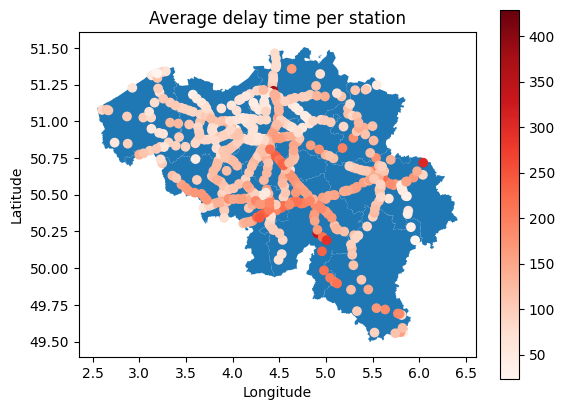

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.provinces.plot(ax=ax)
sc =ax.scatter(merged_df3["longitude"], merged_df3["latitude"], c = merged_df3["Average delay time"], cmap = "Reds")
cbar = fig.colorbar(sc)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Average delay time per station")
plt.show()



# Plot the percentage of delays per station on a map

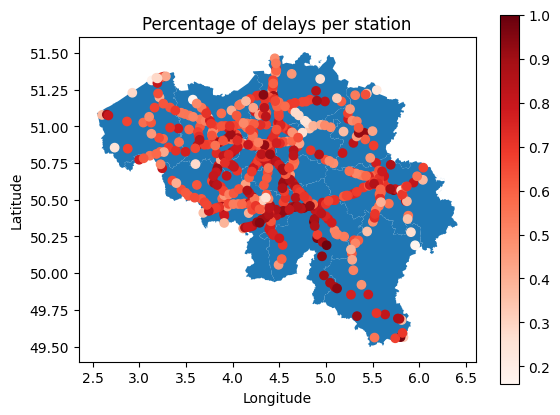

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.provinces.plot(ax=ax)

sc = ax.scatter(merged_df3["longitude"], merged_df3["latitude"], c = merged_df3["Percentage of delays"], cmap = "Reds")
cbar = fig.colorbar(sc)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Percentage of delays per station")
plt.show()


# 14 delay time , satisf score
